In [1]:
# Основные
from osgeo import gdal
from osgeo import ogr
from osgeo import osr
from osgeo import gdal_array
from osgeo import gdalconst

import numpy as np

import matplotlib.pyplot as plt
from pylab import *

%matplotlib inline



mask0 = np.array([[  1, 0, 0, 0, 0, 0, 0, 0, 2],
                  [  1, 1, 0, 0, 0, 0, 0, 2, 2],
                  [  1, 1, 1, 0, 0, 0, 2, 2, 2],
                  [  1, 1, 1, 1, 0, 2, 2, 2, 2],
                  [  1, 1, 1, 1, 0, 2, 2, 2, 2],
                  [  1, 1, 1, 1, 0, 2, 2, 2, 2],
                  [  1, 1, 1, 0, 0, 0, 2, 2, 2],
                  [  1, 1, 0, 0, 0, 0, 0, 2, 2],
                  [  1, 0, 0, 0, 0, 0, 0, 0, 2]], dtype=np.uint8)

mask90 = np.array([[ 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [  0, 1, 1, 1, 1, 1, 1, 1, 0],
                  [  0, 0, 1, 1, 1, 1, 1, 0, 0],
                  [  0, 0, 0, 1, 1, 1, 0, 0, 0],
                  [  0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [  0, 0, 0, 2, 2, 2, 0, 0, 0],
                  [  0, 0, 2, 2, 2, 2, 2, 0, 0],
                  [  0, 2, 2, 2, 2, 2, 2, 2, 0],
                  [  2, 2, 2, 2, 2, 2, 2, 2, 2]], dtype=np.uint8)

print mask0
print ' ' 
print mask90
print type(mask90.shape[0])


[[1 0 0 0 0 0 0 0 2]
 [1 1 0 0 0 0 0 2 2]
 [1 1 1 0 0 0 2 2 2]
 [1 1 1 1 0 2 2 2 2]
 [1 1 1 1 0 2 2 2 2]
 [1 1 1 1 0 2 2 2 2]
 [1 1 1 0 0 0 2 2 2]
 [1 1 0 0 0 0 0 2 2]
 [1 0 0 0 0 0 0 0 2]]
 
[[1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 2 2 2 0 0 0]
 [0 0 2 2 2 2 2 0 0]
 [0 2 2 2 2 2 2 2 0]
 [2 2 2 2 2 2 2 2 2]]
<type 'long'>


In [2]:
# Подсчет кол-ва элементов маски с заданным значением
def count_mask_elem(mask, val):
    counter = 0.0
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask[i][j] == val:
                counter +=1.0
    return counter


In [ ]:

# Бинаризация изображения резких краев
def image_mask_rer(image, mask, b_por, sg_por):
    edge_image=np.zeros((image.shape[0], image.shape[1]), dtype=np.ubyte)
    print 'edge_image.shape[0], edge_image.shape[1]: ', edge_image.shape[0], edge_image.shape[1]
    elem_cnt1=count_mask_elem(mask, 1) 
    elem_cnt2=count_mask_elem(mask, 2)
    sh= np.floor(mask.shape[0]/2.0)
    print 'elem_cnt1: ', elem_cnt1, 'type(elem_cnt1): ', type(elem_cnt1)
    print 'elem_cnt2: ', elem_cnt2, 'type(elem_cnt2): ', type(elem_cnt2)
    print 'sh: ', sh, 'type(sh): ', type(sh)
    print 'image.shape[0] - mask.shape[0]: ', image.shape[0] - mask.shape[0]
    print 'image.shape[1] - mask.shape[1]: ', image.shape[1] - mask.shape[1]
    for r in range(image.shape[0] - mask.shape[0]):
        for c in range(image.shape[1] - mask.shape[1]):
            pixel_res=0
            m1=0.0
            m2=0.0
            sg1=0.0
            sg2=0.0
            for i in range(mask.shape[0]):
                for j in range(mask.shape[1]):
                    if mask[i][j] == 1:
                        m1=m1 + image[r+i][c+j]
                        sg1=sg1 + (image[r+i][c+j] * image[r+i][c+j])
                    if mask[i][j] == 2:
                        m2=m2 + image[r+i][c+j]
                        sg2=sg2 + (image[r+i][c+j] * image[r+i][c+j])
            m1 = m1/elem_cnt1
            m2 = m2/elem_cnt2
            sg1= sg1/elem_cnt1
            sg2= sg2/elem_cnt2
            if (sg1-m1*m1) > 0 and (sg2-m2*m2) > 0:
                sg1=(sg1-m1*m1) ** 0.5
                sg2=(sg2-m2*m2) ** 0.5
                if abs(m1-m2)>b_por and sg1 < sg_por and sg2 < sg_por:
                    pixel_res = 127
                else:
                    pixel_res = 0
            else:
                #print 'r: ', r, 'c: ', c
                #print 'm1: ', m1, 'sg1: ', sg1, 'sg1-m1*m1: ', sg1-m1*m1
                #print 'm2: ', m2, 'sg2: ', sg2, 'sg2-m2*m2: ', sg2-m2*m2
                pixel_res = 0
            edge_image[r+sh][c+sh] = pixel_res
    return edge_image


In [8]:

# Бинаризация изображения резких краев
def image_mask_rer2(image, mask, b_por, sg_por):
    edge_image=np.zeros((image.shape[0], image.shape[1]), dtype=np.ubyte)
    print 'edge_image.shape[0], edge_image.shape[1]: ', edge_image.shape[0], edge_image.shape[1]
    elem_cnt1=count_mask_elem(mask, 1) 
    elem_cnt2=count_mask_elem(mask, 2)
    sh= np.int(mask.shape[0]/2)
    print 'elem_cnt1: ', elem_cnt1, 'type(elem_cnt1): ', type(elem_cnt1)
    print 'elem_cnt2: ', elem_cnt2, 'type(elem_cnt2): ', type(elem_cnt2)
    print 'sh: ', sh, 'type(sh): ', type(sh)
    print 'image.shape[0] - mask.shape[0]: ', image.shape[0] - mask.shape[0]
    print 'image.shape[1] - mask.shape[1]: ', image.shape[1] - mask.shape[1]
    for r in xrange(image.shape[0] - mask.shape[0]):
        for c in xrange(image.shape[1] - mask.shape[1]):
            pixel_res=0
            m1=0.0
            m2=0.0
            sg1=0.0
            sg2=0.0
            for i in xrange(mask.shape[0]):
                for j in xrange(mask.shape[1]):
                    if mask[i, j] == 1:
                        m1 = m1 + image[r+i, c+j]
                        sg1 = sg1 + float(image[r+i, c+j]) * float(image[r+i, c+j])
                    if mask[i, j] == 2:
                        m2 = m2 + image[r+i, c+j]
                        sg2 = sg2 + float(image[r+i, c+j]) * float(image[r+i, c+j])
            m1 = m1/elem_cnt1
            m2 = m2/elem_cnt2
            sg1=(sg1/elem_cnt1-m1*m1) ** 0.5
            sg2=(sg2/elem_cnt2-m2*m2) ** 0.5
            if abs(m1-m2)>b_por and sg1 < sg_por and sg2 < sg_por:
                pixel_res = 200
                #print 'r+sh: ', r+sh, 'c+sh: ', c+sh
            else:
                pixel_res = 0
            edge_image[r+sh, c+sh] = pixel_res
    return edge_image


Driver short name BMP
Driver long name MS Windows Device Independent Bitmap
Raster size 780 x 780
Number of bands 1
Projection 
Geo transform (0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(9L, 9L)
(780L, 780L)
Wall time: 61 ms


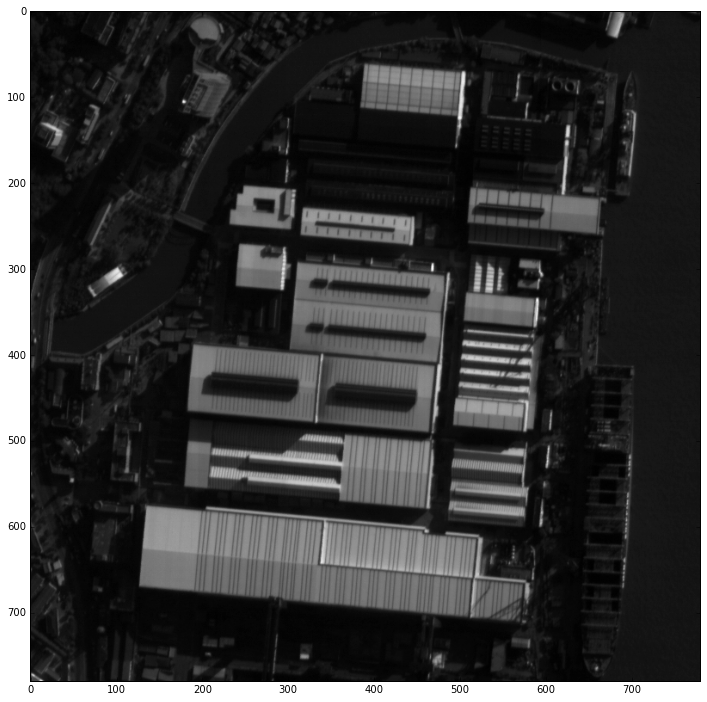

In [4]:
%%time

# блок T1

# gdal_image_obj = gdal.Open( "/home/pavel/test/11.bmp" )

gdal_image_obj = gdal.Open( u'E:\\KADR\\11.bmp' )
gdal_band = gdal_image_obj.GetRasterBand(1)
image_band_1 = gdal_band.ReadAsArray()

# проверяем все ли в порядке
if gdal_image_obj is None:
    print "ERROR: can't open raster"
else:
    print "Driver short name", gdal_image_obj.GetDriver().ShortName
    print "Driver long name", gdal_image_obj.GetDriver().LongName
    print "Raster size", gdal_image_obj.RasterXSize, "x", gdal_image_obj.RasterYSize
    print "Number of bands", gdal_image_obj.RasterCount
    print "Projection", gdal_image_obj.GetProjection()
    print "Geo transform", gdal_image_obj.GetGeoTransform()


plt.rcParams['figure.figsize'] = (12, 12)  # Размер картинок
gray()
imgplot = plt.imshow(image_band_1)

print mask0.shape
print image_band_1.shape


Тип исходного растра:  <type 'numpy.ndarray'>
Тип элемента исходного растра:  <type 'numpy.uint8'>
Размер 0 исходного растра растра:  780
Размер 1 исходного растра растра:  780
edge_image.shape[0], edge_image.shape[1]:  780 780
elem_cnt1:  24.0 type(elem_cnt1):  <type 'float'>
elem_cnt2:  24.0 type(elem_cnt2):  <type 'float'>
sh:  4 type(sh):  <type 'int'>
image.shape[0] - mask.shape[0]:  771
image.shape[1] - mask.shape[1]:  771
Тип выходного растра:  <type 'numpy.ndarray'>
Тип элемента выходного растра:  <type 'numpy.uint8'>
Размер 0 выходного растра растра:  780
Размер 1 выходного растра растра:  780
Wall time: 4min 8s


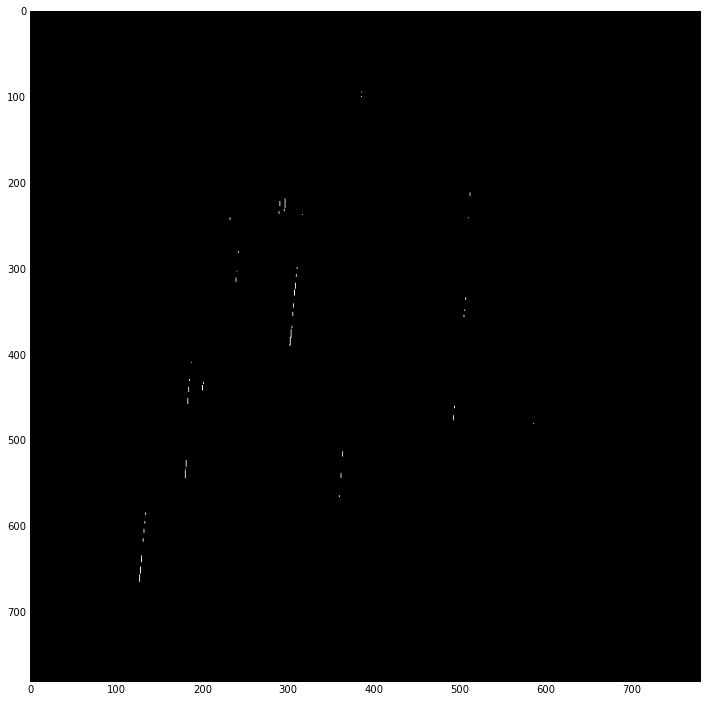

In [9]:
%%time

# блок T2

b_por = 50
sg_por = 5

print 'Тип исходного растра: ', type(image_band_1)
print 'Тип элемента исходного растра: ', type(image_band_1[0][0])
print 'Размер 0 исходного растра растра: ', image_band_1.shape[0]
print 'Размер 1 исходного растра растра: ', image_band_1.shape[1]

edge_image_rastr = image_mask_rer2(image_band_1, mask0, b_por, sg_por)

print 'Тип выходного растра: ', type(edge_image_rastr)
print 'Тип элемента выходного растра: ', type(edge_image_rastr[0][0])
print 'Размер 0 выходного растра растра: ', edge_image_rastr.shape[0]
print 'Размер 1 выходного растра растра: ', edge_image_rastr.shape[1]

driver = gdal.GetDriverByName( gdal_image_obj.GetDriver().ShortName )

# output_image_obj = gdal.Open( "/home/pavel/test/11_edge.bmp" )

output_image_obj = driver.CreateCopy( u'E:\\KADR\\11_edge.bmp', gdal_image_obj, 0 )

plt.rcParams['figure.figsize'] = (12, 12)  # Размер картинок
imgplot = plt.imshow(edge_image_rastr)

output_image_obj.GetRasterBand( 1 ).WriteArray( edge_image_rastr )
# после записи данных закрываем датасет
output_image_obj = None
